# Problem Statement:

Develop a model that predict forest fire(fire/not fire) based on the attributes.

## Data Set Information:

- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. 
- 122 instances for each region. 
- The period from June 2012 to September 2012. 
- The dataset includes 11 attribues and 1 output attribue (class) 
- The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.




## Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) 
Weather data observations 
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8 
FWI Components 
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system: 7 to 220.4 
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68 
11. Fire Weather Index (FWI) Index: 0 to 31.1 
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€ 



In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
#importing Machine Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix,ConfusionMatrixDisplay,accuracy_score ,recall_score,
                             precision_score, f1_score, classification_report)



In [3]:
#read csv file

fire_df_Bejaia=pd.read_csv('../Downloads/Algerian_forest_fires_dataset_UPDATE-2.csv')
fire_df_SidiBel=pd.read_csv('../Downloads/Algerian_forest_fires_dataset_UPDATE-3.csv')

In [4]:
#to display max columns = 300
pd.set_option('display.max_rows',300)

In [5]:
fire_df_Bejaia.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [6]:
fire_df_SidiBel.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [7]:
#merging two dataset into one(adding rows)

fire_df=pd.concat([fire_df_Bejaia,fire_df_SidiBel],copy=False,join='inner')

In [8]:
fire_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


## EDA

In [9]:
#renaming columns to trip spaces
fire_df.rename(columns={
                      ' RH':'Re_humd',' Ws':'WinSpeed','Rain ':'rain','Classes  ':'Classes'
    },inplace=True)

In [10]:
fire_df.columns

Index(['day', 'month', 'year', 'Temperature', 'Re_humd', 'WinSpeed', 'rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [11]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   Re_humd      244 non-null    int64  
 5   WinSpeed     244 non-null    int64  
 6   rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 28.6+ KB


In [12]:
#dropping null values

fire_df.dropna(inplace=True)

In [13]:
#changing data types
fire_df['FWI']=fire_df['FWI'].astype('float')
fire_df['DC']=fire_df['DC'].astype('float')
fire_df['Classes']=fire_df['Classes'].astype('string')

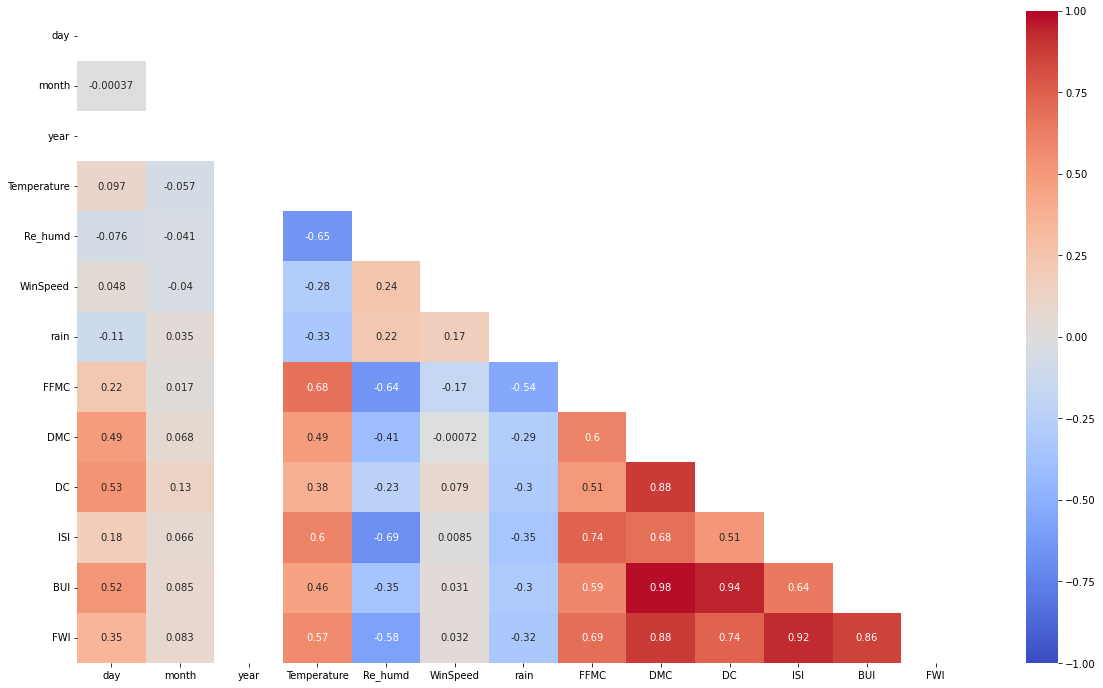

In [14]:
#vistualising Heatmap
plt.figure(figsize=(20,12))

# creating mask
mask = np.triu(np.ones_like(fire_df.drop(columns='Classes').corr()))
 
sns.heatmap(data = fire_df.drop(columns='Classes').corr(),
            vmin = -1,
            vmax = +1,
            cmap = 'coolwarm',
            annot = True,
            mask = mask);

since some features are showing multicollinearity,checking variance infaltion factor

In [15]:
# we can define a function to calculate vif:
def calc_vif(data):
    v_df = pd.DataFrame(columns = ['vif'],
                       index = data.columns)
    
    v_df['vif'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    
    return v_df.sort_values(by = 'vif', ascending = False)

In [16]:
calc_vif(fire_df.drop(columns='Classes'))

,vif
year,514.359602
BUI,171.616713
DMC,76.480443
FWI,40.471391
DC,25.363045
ISI,23.122783
FFMC,4.120286
Re_humd,2.764923
Temperature,2.415204
rain,1.551373


In [17]:
# dropping highly correlated values:

fire_df.drop(columns= ['year','BUI','DMC','FWI','DC','ISI'],inplace=True)

In [18]:
#getting numerical features

Num_features=fire_df._get_numeric_data().columns

## Handling Outliers
Since Logestic Regression is sensitive to Outliers,we need to deal with Outliers

In [19]:
fire_df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.0,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.0,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.0,42.0
Re_humd,243.0,62.041152,14.828160,21.0,52.50,63.0,73.5,90.0
WinSpeed,243.0,15.493827,2.811385,6.0,14.00,15.0,17.0,29.0
rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.5,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.3,96.0


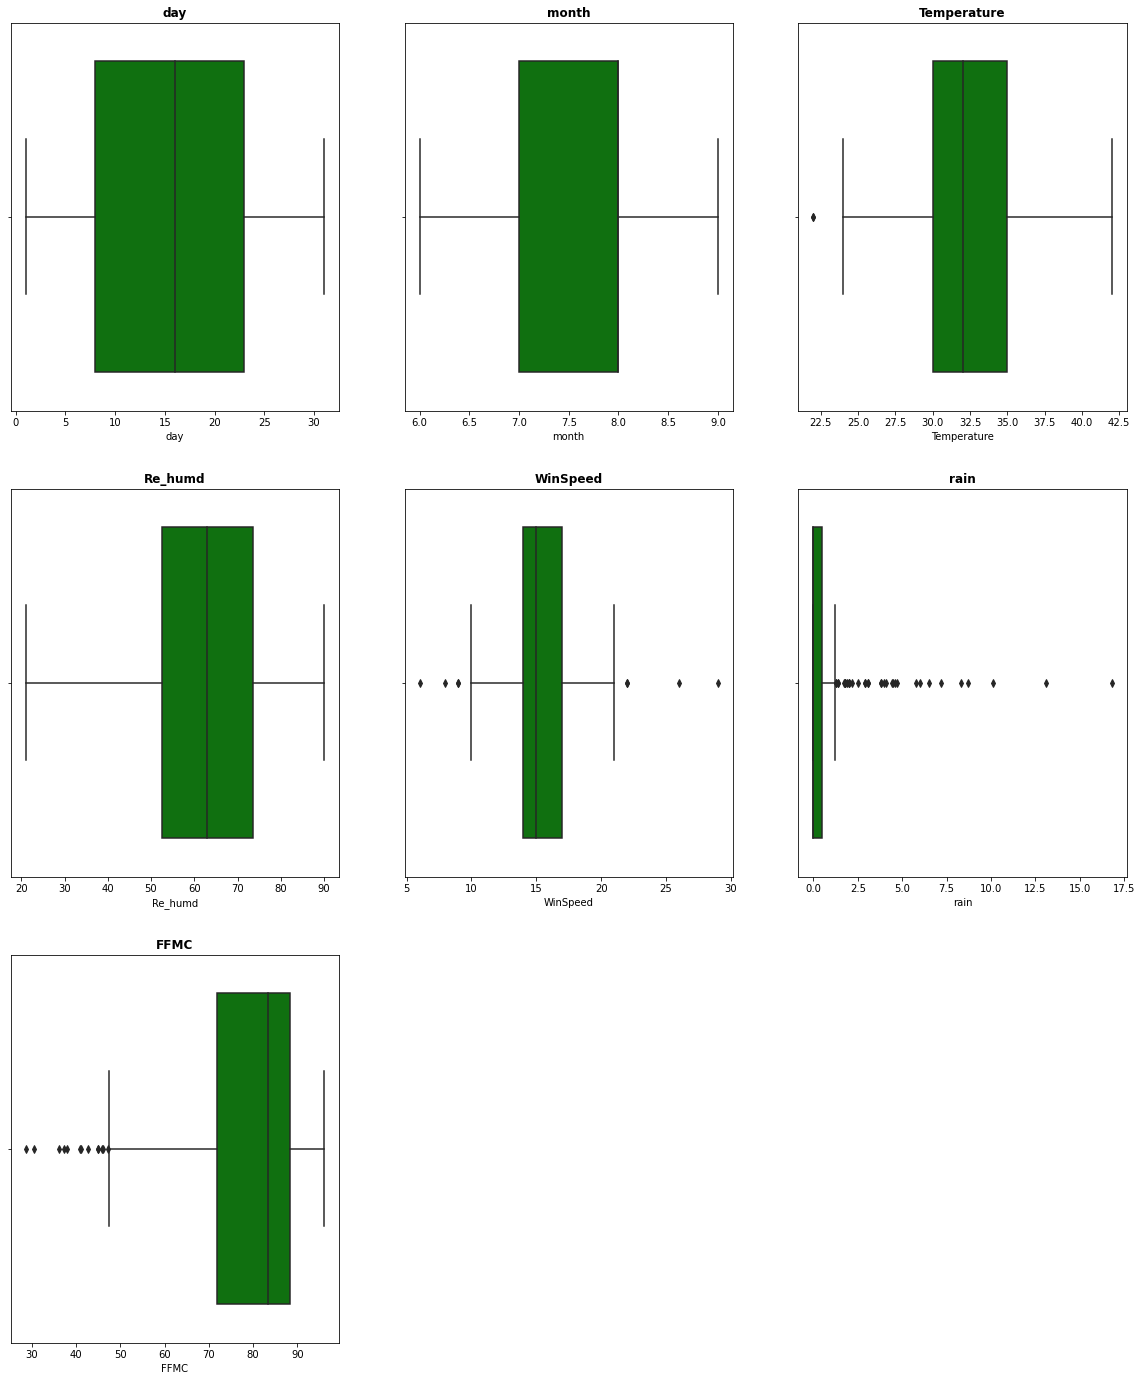

In [20]:
# checking outliers for every column

plt.figure(figsize=(20,50))
for i in enumerate(Num_features):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(data=fire_df,x=i[1],color='g')
    plt.title("{}".format(i[1]),fontweight='bold')
    

In [21]:
#function to find replace outliers with boundaries

def Bridge(data,column):
    IQR=data[column].quantile(.75)-data[column].quantile(.25)
    lower_bridge=data[column].quantile(.25)-(3* IQR)        # for taking extreme outliers
    upper_bridge=data[column].quantile(.75)+(3 * IQR)
    data.loc[data[column] <= lower_bridge,column]=lower_bridge
    data.loc[data[column] >= upper_bridge,column]=upper_bridge
    return(lower_bridge,upper_bridge)
    

In [23]:
#calling funtion to replace outliers with boundaries(checking similar way)
Bridge(fire_df,'WinSpeed')
Bridge(fire_df,'rain')
Bridge(fire_df,'FFMC')
Bridge(fire_df,'Temperature')
Bridge(fire_df,'Re_humd')

(-10.5, 136.5)

### BULIDING MODEL

#### Training Model

In [24]:
# Split into training & testing sets
X=fire_df.drop(columns='Classes') # dependent Variable
y=fire_df['Classes']              #independent Variable


In [25]:
# Since y contains white spaces
y=y.apply(lambda x:x.strip())

In [26]:
#train_test_split_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify = y)

In [27]:
X_train.shape,y_train.shape

((162, 7), (162,))

In [28]:
X_test.shape,y_test.shape

((81, 7), (81,))

### Feature Engineering/Standard Scalar

In [29]:
Scalar=StandardScaler()

In [30]:
Scalar

StandardScaler()

In [31]:
# Standardising using fit_tranform method
X_train=Scalar.fit_transform(X_train)
X_train

array([[ 1.57322564,  0.50189655,  0.47754373, ..., -0.23218636,
        -0.60117864,  0.8253157 ],
       [-0.93548853,  1.41546105, -0.68579588, ..., -0.60460409,
        -0.60117864,  0.30519861],
       [ 1.6872581 , -0.41166795,  1.35004843, ..., -0.23218636,
        -0.60117864,  0.83307864],
       ...,
       [-0.70742361, -1.32523245, -1.26746568, ..., -1.34943955,
        -0.60117864, -0.41675496],
       [ 1.23112825,  1.41546105, -1.26746568, ..., -0.23218636,
         2.47594426, -2.90865921],
       [ 1.57322564,  0.50189655,  0.76837863, ...,  0.5126491 ,
         0.62967052, -0.45556967]])

In [32]:
#standardising using transform(only) method to avoid data leakage

X_test=Scalar.transform(X_test)

### LOGESTIC REGRESSION

In [33]:
#Instantiate our model.
logreg = LogisticRegression()

In [34]:
# Fit our model.
logreg.fit(X_train, y_train)

LogisticRegression()

### Prediction for Test Data

In [35]:
y_pred=logreg.predict(X_test)

In [36]:
y_pred

array(['fire', 'not fire', 'fire', 'not fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'not fire', 'fire',
       'fire', 'fire', 'not fire', 'fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'not fire', 'not fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'fire', 'not fire', 'not fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'not fire', 'not fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'fire', 'not fire', 'not fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'fire', 'not fire', 'fire', 'not fire',
       'not fire', 'fire'], dtype=object)

### PERFORMANCE MATRIX

####  1.Confusion matrix

In [37]:
Confusion_matrix=confusion_matrix(y_test,y_pred)

In [38]:
Confusion_matrix

array([[45,  1],
       [ 1, 34]])

In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [40]:
tn #True Negative

45

In [41]:
fp # False Positive

1

In [42]:
fn #False Negative

1

In [43]:
tp #True Positive

34

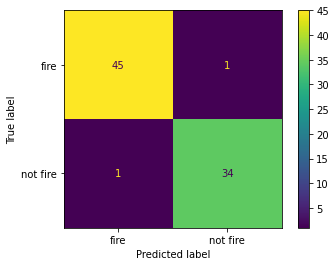

In [44]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test);

### 2.Accuracy

In [47]:

Accuracy=accuracy_score( y_test,y_pred) 

#Count of (correct predictions)/(all predictions)
#The proportion of correct predictions made.
Accuracy

0.9753086419753086

Accuracy of our model is 97.5%

#### 3.Precision score

In [48]:
#proportion of predicted positives are correct
tp / (tp + fp)

0.9714285714285714

In [49]:
precision = precision_score(y_test, y_pred,pos_label='not fire')
precision

0.9714285714285714

precision of our model is .971

In [50]:
precision = precision_score(y_test, y_pred, pos_label='fire')
precision

0.9782608695652174

precision of our model is .978(for fire)

### 4.Recall Score

In [51]:
#The proportion of actual positives correctly diagnosed by the model
sens = tp / (tp + fn)
sens

0.9714285714285714

In [52]:
recall = recall_score(y_test, y_pred, pos_label='fire')
recall

0.9782608695652174

recall score of our model is .978(fire)

In [53]:
recall = recall_score(y_test, y_pred, pos_label='not fire')
recall

0.9714285714285714

recall score of our model is .971 (not fire)

### 5.F1 score

In [54]:
# by hand
2 * (precision*recall) / (precision+recall)

0.9748327492832112

In [55]:
# from sklearn
f1_score(y_test, y_pred, pos_label='fire')

0.9782608695652174

### 6.Classification Report

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        fire       0.98      0.98      0.98        46
    not fire       0.97      0.97      0.97        35

    accuracy                           0.98        81
   macro avg       0.97      0.97      0.97        81
weighted avg       0.98      0.98      0.98        81

